<a href="https://colab.research.google.com/github/Akasonal/Recommendation-System/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
movie=pd.read_csv("Movie_Id_Titles.txt",sep=",")
movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df=pd.read_csv("u.data.txt",sep="\t",names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
#As we need both the data frame combinely hence we need to merge both the dataset to get whole sum dataset
movie_data=pd.merge(df,movie,on="item_id")
movie_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
movie_data.dtypes

user_id       int64
item_id       int64
rating        int64
timestamp     int64
title        object
dtype: object

## Data Preprocessing

In [6]:
movie_data.shape

(100003, 5)

In [7]:
movie_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100003.0,4.624709e+02,2.666225e+02,0.0,254.0,447.0,682.0,943.0
item_id,100003.0,4.255209e+02,3.307978e+02,1.0,175.0,322.0,631.0,1682.0
rating,100003.0,3.529864e+00,1.125704e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100003.0,8.835288e+08,5.343791e+06,874724710.0,879448715.0,882826944.0,888259984.0,893286638.0


In [8]:
cat_data=movie_data.dtypes[movie_data.dtypes=="object"].describe()
cat_data #statistical description about categorical data

count          1
unique         1
top       object
freq           1
dtype: object

In [9]:
movie_data.columns  #print columns of movies data

Index(['user_id', 'item_id', 'rating', 'timestamp', 'title'], dtype='object')

In [10]:
movie_data.groupby(["title"])["rating"].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [11]:
movie_data.groupby(["title"])["rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [12]:
mean_rating=movie_data.groupby(["title"])["rating"].mean()
mean_rating.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [13]:
##creating the data frame which consist the mean and count of rating
rating=pd.DataFrame(movie_data.groupby(["title"])["rating"].mean())
rating.tail()

,rating
title,
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667
unknown,3.444444
Á köldum klaka (Cold Fever) (1994),3.000000


In [14]:
## Adding the count of rating for each movies
rating["rating_count"]=movie_data.groupby(["title"])["rating"].count().sort_values(ascending=False)
rating.head()

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [15]:
rating=rating.sort_values("rating_count",ascending=False)
rating.head()  #arranging the rating of movies based on the maximumnumber of people voted

,rating,rating_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


## Data Visualization

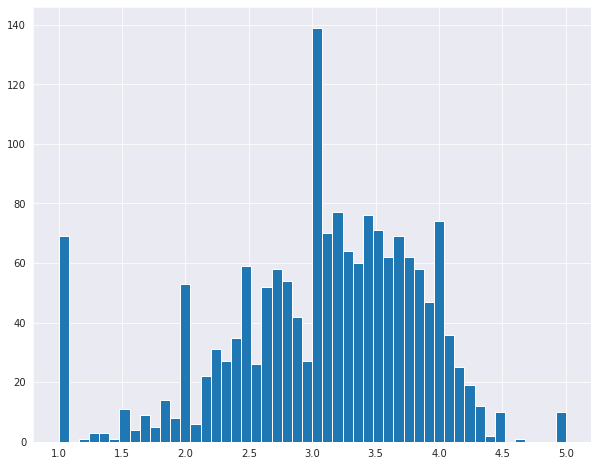

In [16]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
rating["rating"].hist(bins=50)
plt.show()

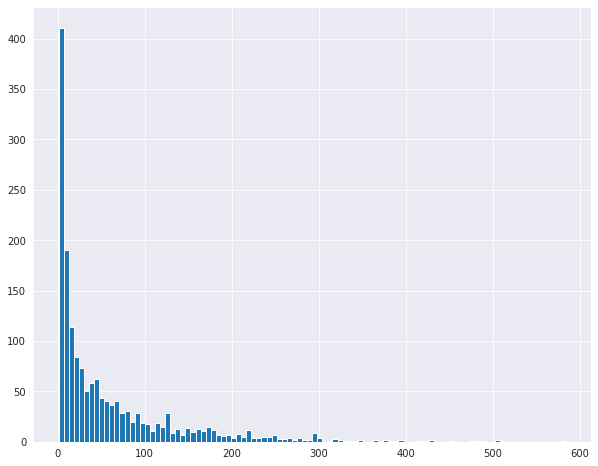

In [17]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
rating["rating_count"].hist(bins=100)
plt.show()

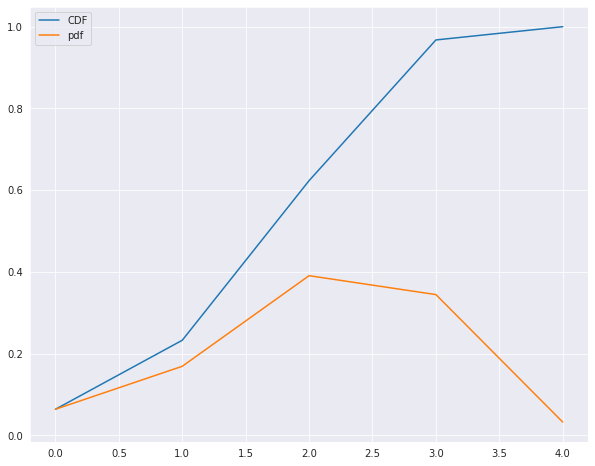

In [18]:
##cdf plot to understand rating of data
plt.figure(figsize=(10,8))
counts,bin_edges=np.histogram(rating["rating"],bins=5,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(cdf,label="CDF")
plt.plot(pdf,label="pdf")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


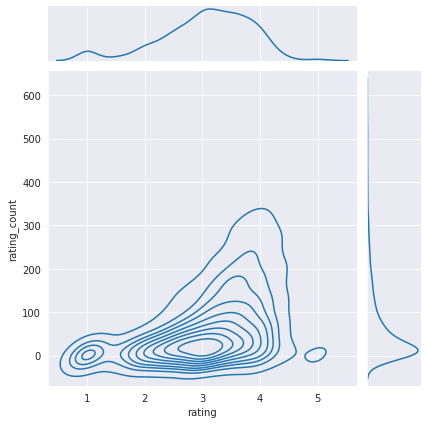

In [19]:
sns.jointplot("rating","rating_count",data=rating,kind="kde")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


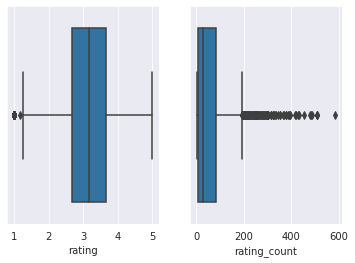

In [20]:
j=1
for i in rating.columns:
  if j<=len(rating.columns):
    plt.subplot(1,2,j)
    sns.boxplot(rating[i])
    plt.xlabel(i)
  j+=1
plt.show()

## Pre Recommendation Steps

In [21]:
# converting the tabel of movie data intop pivot table
movie_mat=movie_data.pivot_table(index="user_id",columns="title",values="rating")
movie_mat.head(10)  #Rating given by a  single user insde the matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3

In [22]:
#list of movies present in data set
len(movie_mat.columns)   #Total number of different different movies consisted in given movie_mat dataset

1664

In [23]:
#printing the rating of a particular movies
starwars_rating=movie_mat['Star Wars (1977)']
starwars_rating.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [29]:
#finding the correlation between dataset of movie matrix and particular movies
Movie_corr_with_star_wars=movie_mat.corrwith(starwars_rating)
Movie_corr_with_star_wars=Movie_corr_with_star_wars[Movie_corr_with_star_wars.notnull()]
corr_starwars=pd.DataFrame(Movie_corr_with_star_wars.sort_values(ascending=False),columns=['Correlated'])
corr_starwars.head(10)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlated
title,
No Escape (1994),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Golden Earrings (1947),1.0
Mondo (1996),1.0


In [30]:
## Arranging all those correlated movies with their rating count
corr_starwars=corr_starwars.join(rating["rating_count"])
corr_starwars

,Correlated,rating_count
title,,
No Escape (1994),1.0,5
Man of the Year (1995),1.0,9
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
...,...,...
Theodore Rex (1995),-1.0,5
I Like It Like That (1994),-1.0,3
Two Deaths (1995),-1.0,4


In [31]:
#will take only those movies which is having rating greater than 150
corr_starwars=corr_starwars[corr_starwars["rating_count"]>150].sort_values("Correlated",ascending=False)
corr_starwars.head(10)

,Correlated,rating_count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
L.A. Confidential (1997),0.319065,297
"Bridge on the River Kwai, The (1957)",0.316580,165
E.T. the Extra-Terrestrial (1982),0.303619,300
